# Regresión logistica 
En este cuaderno, exploraremos el concepto de regresión logistica y su aplicación práctica mediante un ejemplo en Python. Para comenzar, el primer paso consistirá en la descarga de datos y comprender su contenido.

links para más información:
- https://es.wikipedia.org/wiki/Regresi%C3%B3n_log%C3%ADstica
- 

## Importa las librerias necesarias

In [1]:
# Manipulación de datos
import numpy as np
import pandas as pd
# Visualización
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
sns.set_theme(style='whitegrid', context='notebook')

# Modelos
## Preparar datos
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
## Regresión logistica
from sklearn.linear_model import LogisticRegression

## Evaluación
from sklearn.metrics import confusion_matrix, classification_report

# evita warnings
import warnings


## Importando datos
en este caso se toman los datos del modulo de Kaggle
https://www.kaggle.com/datasets/blastchar/telco-customer-churn
https://community.ibm.com/community/user/businessanalytics/blogs/steven-macko/2019/07/11/telco-customer-churn-1113 

In [2]:
warnings.filterwarnings('ignore')


In [5]:
# Cargar datos
df_compras = pd.read_excel('datasets\compras_classificaion.xlsx')
df_compras.head()

,Purchasing behaviour,Gender,Age,Time spent in online shop
0,Buy now,female,22,40
1,Buy now,female,25,23
2,Buy now,male,18,12
3,Buy now,male,45,28
4,Buy now,female,12,43


## Entendiendo los datos ( Análisis exploratorio de datos)


In [6]:
df_compras.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Purchasing behaviour       24 non-null     object
 1   Gender                     24 non-null     object
 2   Age                        24 non-null     int64 
 3   Time spent in online shop  24 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 896.0+ bytes


In [7]:
df_compras.describe()

,Age,Time spent in online shop
count,24.000000,24.000000
mean,37.583333,42.250000
std,17.385443,23.532124
min,12.000000,11.000000
25%,26.500000,26.750000
50%,33.500000,37.000000
75%,44.250000,55.250000
max,88.000000,110.000000


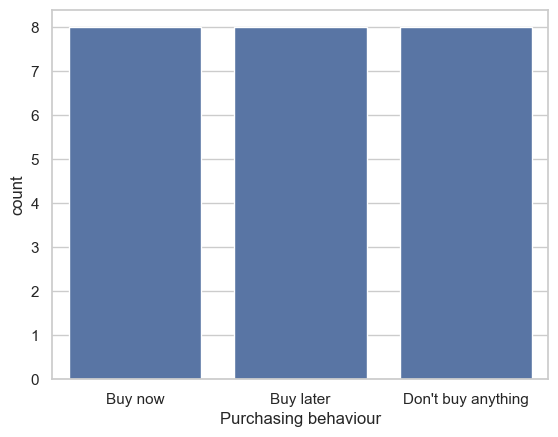

In [8]:
# Visualización de target "Purchasing behaviour"
sns.countplot(x='Purchasing behaviour', data=df_compras)
plt.show()


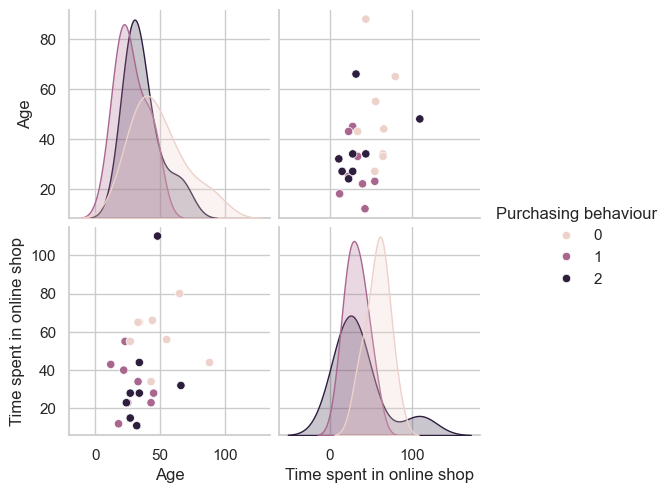

In [15]:
# pairplot
sns.pairplot(df_compras, hue='Purchasing behaviour')
plt.show()


In [ ]:
#balanceado

<Axes: xlabel='Gender', ylabel='count'>

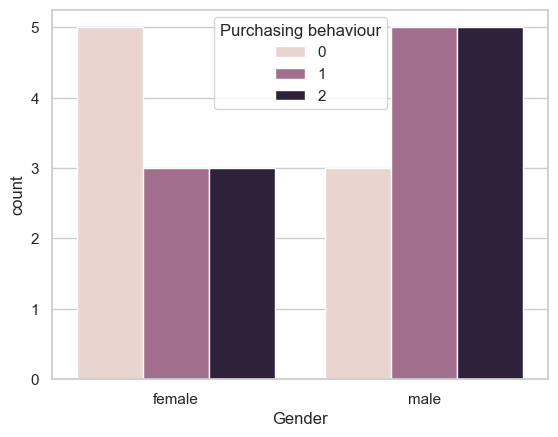

In [18]:
# ver target vs "gender" variable
sns.countplot(x='Gender',hue='Purchasing behaviour', data=df_compras)

# Preparando los datos  

Dentros del Preprocesamiento de los datos se debe de asegurar:

- Eliminar duplicados
- Evaluar nulos
- Remover columnas innecesarias(codigo, id, etc)
- Remover outliers
- Normalizar  o Estandarizar o Escalar los datos
- Crear variables dummy
- Crear variables polinomiales

In [20]:
# ver nulos
df_compras_preprocesado = df_compras.copy()
df_compras.isnull().sum()

Purchasing behaviour         0
Gender                       0
Age                          0
Time spent in online shop    0
dtype: int64

In [21]:
# hacer numerica la columna target
# ver valores unicos
df_compras['Purchasing behaviour'].unique()

array([1, 2, 0], dtype=int64)

In [22]:
# hacer numerica la columna target con valores 'Buy now', 'Buy later', "Don't buy anything"
df_compras_preprocesado['Purchasing behaviour'] = df_compras_preprocesado['Purchasing behaviour'].map({'Buy now': 1, 'Buy later': 2, "Don't buy anything": 0})

In [24]:
# encoding las columnas categoricas

df_compras_preprocesado = pd.get_dummies(df_compras_preprocesado)
df_compras_preprocesado.head(2)

,Purchasing behaviour,Age,Time spent in online shop,Gender_female,Gender_male
0,1,22,40,True,False
1,1,25,23,True,False
2,1,18,12,False,True
3,1,45,28,False,True
4,1,12,43,True,False
5,1,43,23,False,True
6,1,23,55,False,True
7,1,33,34,False,True
8,2,27,28,True,False
9,2,27,15,True,False


In [25]:
# convertir a a 1 y 0 las columnas binarias de df_encoded

# List of binary columns to convert
binary_columns = [col for col in df_compras_preprocesado.columns if df_compras_preprocesado[col].dtype== 'bool']
# Convert binary columns to 1 and 0
for column in binary_columns:
    df_compras_preprocesado[column] = df_compras_preprocesado[column].astype('int')
df_prepocessing=df_compras_preprocesado.copy()

# EDA de los datos

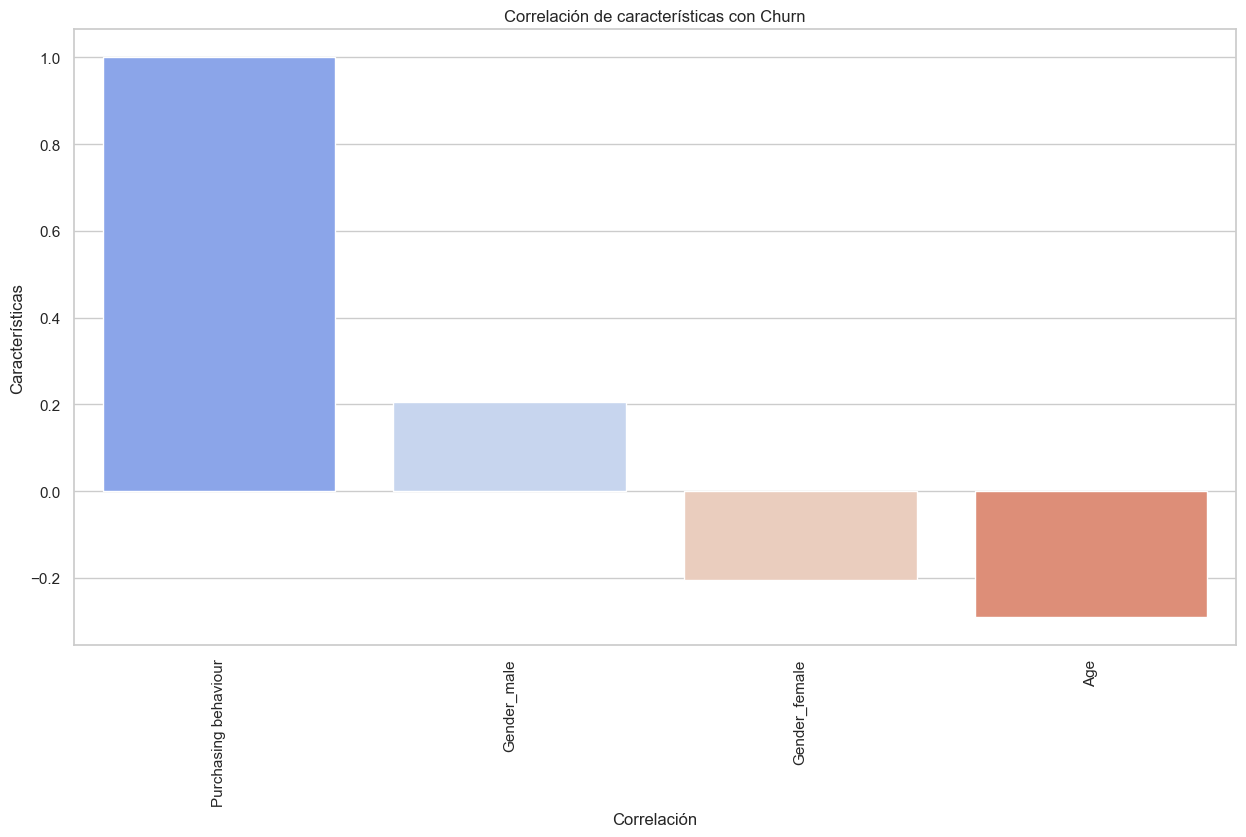

In [28]:
# ver corelaciones en diagrama de barras
plt.figure(figsize=(15,8))
data_corr =pd.DataFrame(df_compras_preprocesado.corr()['Purchasing behaviour'].sort_values(ascending=False)[:-1]).reset_index()
sns.barplot(y='Purchasing behaviour', x='index', data=data_corr, palette='coolwarm')
plt.xlabel('Correlación')
plt.ylabel('Características')
plt.title('Correlación de características con Churn')
plt.xticks(rotation=90)
plt.show()

## Modelo

In [29]:
# separar en train y test
X = df_prepocessing.drop('Purchasing behaviour', axis=1)
y = df_prepocessing['Purchasing behaviour']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
 

# Pipelines

In [30]:
# make a pipeline, standardize and train a logistic regression model
from sklearn.pipeline import make_pipeline
pipe = make_pipeline(StandardScaler(), LogisticRegression())
pipe.fit(X_train, y_train)

# predict
y_pred = pipe.predict(X_test)



In [35]:
pipe
#https://scikit-learn.org/stable/auto_examples/miscellaneous/plot_pipeline_display.html#sphx-glr-auto-examples-miscellaneous-plot-pipeline-display-py

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [ ]:
# make a grid search
from sklearn.model_selection import GridSearchCV

#paramestros para logistic regression: C, penalty, solver
param_grid = {'logisticregression__C': np.logspace(-3,3,7)
              , 'logisticregression__penalty': ['l1', 'l2']
              , 'logisticregression__solver': ['liblinear', 'saga']
              }

grid = GridSearchCV(pipe, param_grid, cv=5, n_jobs=-1)
grid.fit(X_train, y_train)


# ajustar un modelo con mejores parametros

grid.fit(X_train, y_train)


y_pred = grid.predict(X_test)

## Análisis de resultados

In [36]:
predictions = pipe.predict(X_test)
cm = confusion_matrix(y_test,predictions,labels=pipe.classes_)
cm

array([[2, 0, 0],
       [0, 2, 0],
       [2, 2, 0]], dtype=int64)

In [37]:
# accuracy del modelo
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, predictions)
accuracy

0.5

In [39]:
# classification report
print(classification_report(y_test, predictions))


              precision    recall  f1-score   support

           0       0.50      1.00      0.67         2
           1       0.50      1.00      0.67         2
           2       0.00      0.00      0.00         4

    accuracy                           0.50         8
   macro avg       0.33      0.67      0.44         8
weighted avg       0.25      0.50      0.33         8



In [40]:
# confusion matrix train
predictions_train = pipe.predict(X_train)
cm_train = confusion_matrix(y_train,predictions_train,labels=pipe.classes_)
cm_train

array([[5, 0, 1],
       [0, 6, 0],
       [2, 2, 0]], dtype=int64)

In [41]:
print(classification_report(y_train, predictions_train))


              precision    recall  f1-score   support

           0       0.71      0.83      0.77         6
           1       0.75      1.00      0.86         6
           2       0.00      0.00      0.00         4

    accuracy                           0.69        16
   macro avg       0.49      0.61      0.54        16
weighted avg       0.55      0.69      0.61        16



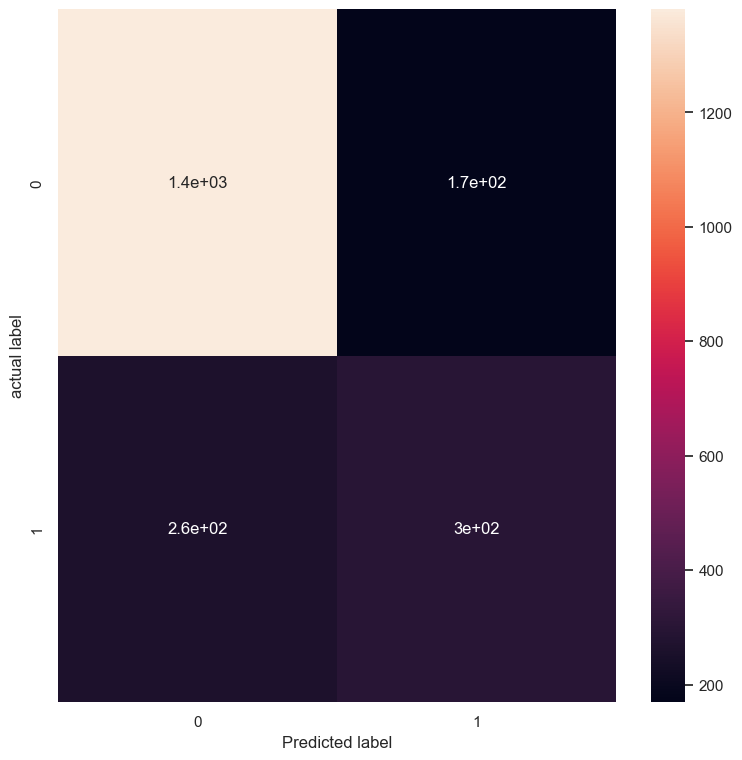

In [34]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True)
plt.ylabel('actual label')
plt.xlabel('Predicted label')
plt.show()

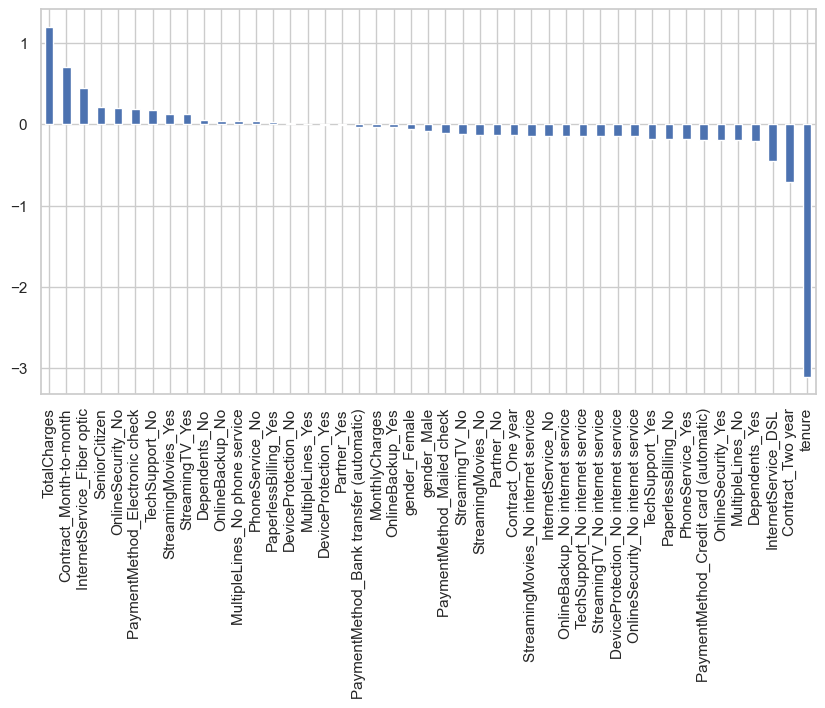

In [29]:
# ver pesos de los modelo
weights = pd.Series(logistic.coef_[0], index=X.columns.values)
weights.sort_values(ascending=False, inplace=True)

# graficar los pesos
plt.figure(figsize=(10,5))
weights.plot(kind='bar')
plt.show()



In [28]:
logistic.predict_proba(x_test)

array([[0.99026199, 0.00973801],
       [0.86142958, 0.13857042],
       [0.30082845, 0.69917155],
       ...,
       [0.99033443, 0.00966557],
       [0.70163287, 0.29836713],
       [0.82938519, 0.17061481]])

In [37]:
print(classification_report(y_test, predictions))
#output_dict=True

              precision    recall  f1-score   support

         0.0       0.84      0.89      0.86      1549
         1.0       0.64      0.53      0.58       561

    accuracy                           0.80      2110
   macro avg       0.74      0.71      0.72      2110
weighted avg       0.79      0.80      0.79      2110



## Generando predicción con el modelo

In [32]:
# Predicción
# se quiere saber la longitud del petalo de una flor con ancho de petalo de 2cm
petal_width = 2 #cm
petal_width_std = estandar_x.transform(np.array([petal_width]).reshape(-1,1))
petal_length_std = regresor.predict(petal_width_std)
#se aplica transformada inversa
print("La longitud del petalo de una flor con ancho de petalo 2cm es de ",estandar_y.inverse_transform( petal_length_std)[0])

La longitud del petalo de una flor con ancho de petalo 2cm es de  [5.54343902]


## Modelo sin variables que no aportan

Text(0.5, 66.24999999999999, 'Predicted label')

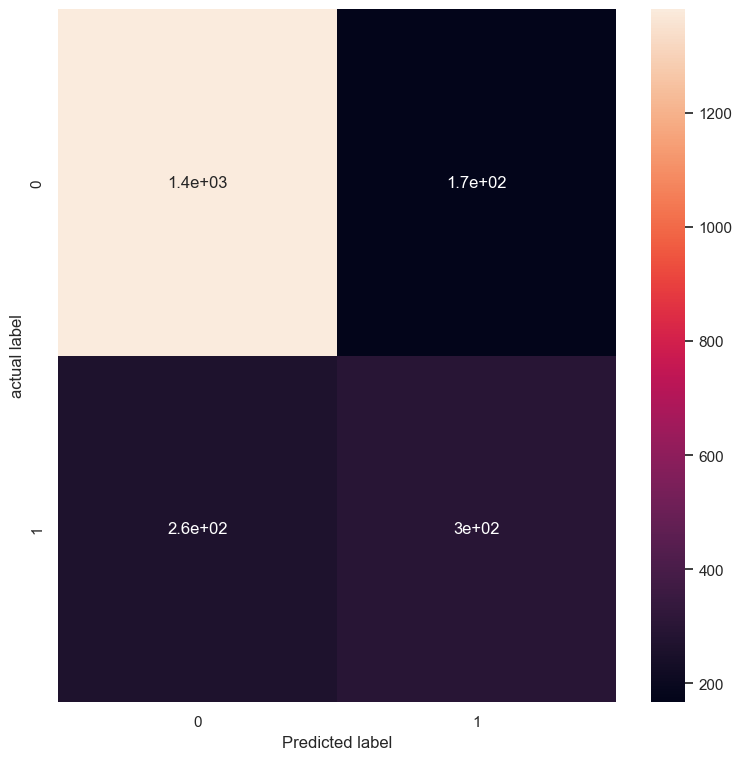

In [38]:
#eliminar variables con baja coeficiente en el modelo entrenado
columns_to_drop = weights[weights.abs() < 0.1].index

X = df_prepocessing_scaled.drop(columns = ['Churn'] + list(columns_to_drop), axis=1)
y = df_prepocessing_scaled['Churn']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

logistic = LogisticRegression()
logistic.fit(x_train,y_train)

predictions = logistic.predict(x_test)
cm = confusion_matrix(y_test,predictions,labels=logistic.classes_)

accuracy = accuracy_score(y_test, predictions)
accuracy

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True)
plt.ylabel('actual label')
plt.xlabel('Predicted label')

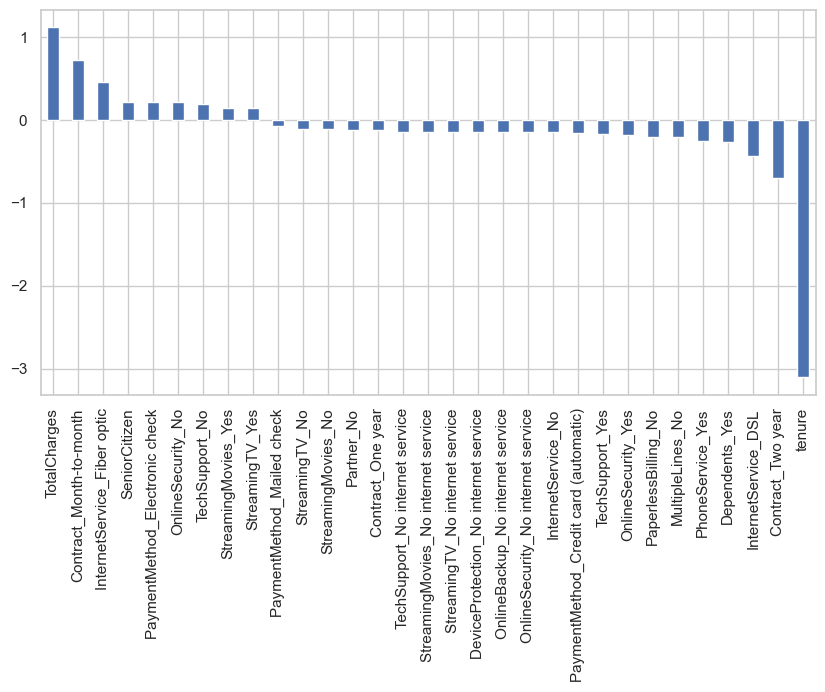

In [39]:
# ver pesos de los modelo
weights = pd.Series(logistic.coef_[0], index=X.columns.values)
weights.sort_values(ascending=False, inplace=True)

# graficar los pesos
plt.figure(figsize=(10,5))
weights.plot(kind='bar')
plt.show()

## Aplicando regularizados al modelo de regresión logistica para evitar overfitting
 tenemos:

- L1 (Lasso)
- L2 (Ridge)
- Elastic Net


In [ ]:
# modelo con L1
logistic = LogisticRegression(penalty='l1', solver='liblinear')
logistic.fit(x_train,y_train)


In [ ]:
# Guardar modelo

import joblib
joblib.dump(logistic, 'modelo_churn.pkl')


In [ ]:
# api con fastapi
from fastapi import FastAPI
from pydantic import BaseModel
import joblib
import numpy as np

# Cargar modelo
modelo = joblib.load('modelo_churn.pkl')

# Definir la clase de entrada
class Datos:
    